# date statistics
I wasn't sure how often horses are actually racing year round, so I wanted to visualize how many races there were per day througout the year. Seems like there's a race pretty much every day in this dataset. Note that some days have no races because that day doesn't exist (ex. feburary 30th)

In [ ]:
import os
import re
import matplotlib.pyplot as plt

files = os.listdir("./equibase/2023 Result Charts")
freq = {}
for m in range(1,13):
    for d in range (1,32):
        dstring = str(m).zfill(2)+"-"+str(d).zfill(2)
        freq[dstring] = 0

for f in files:
    date = re.match("[a-z]{2,3}(\\d{4})(\\d{2})(\\d{2})tch\\.xml",f).groups()
    date = str(date[1])+"-"+str(date[2])
    freq[date]+=1

date, frequency = zip(*freq.items())

plt.bar(date,frequency)
plt.show()

# names
I wanted to find out how many horses there are and test if their names are a reliable identifier. After testing there was the same ammount with both the raw name and `.upper()` so good enough for me

In [ ]:
import xmlschema
import os

xs = xmlschema.XMLSchema("./equibase/tchSchema.xsd")

result_dir = "./equibase/2023 Result Charts" 
files = os.listdir(result_dir)

names = []
for f in files:
    try:
        d = xs.to_dict(result_dir+"/"+f)
    except xmlschema.validators.exceptions.XMLSchemaDecodeError:
        continue
    for r in d['RACE']:
        for e in r['ENTRY']:
            n = e['NAME'].upper()
            if n not in names:
                names.append(n)

print(len(names))

# num races per horse
how many races does each horse run in the year? for trueskill to work well we need to have about 3-5 ish minimum before we start seeing actionable results. this used to use NAME but now it uses AXCISKEY because I found it to be a better primary key

l:56186


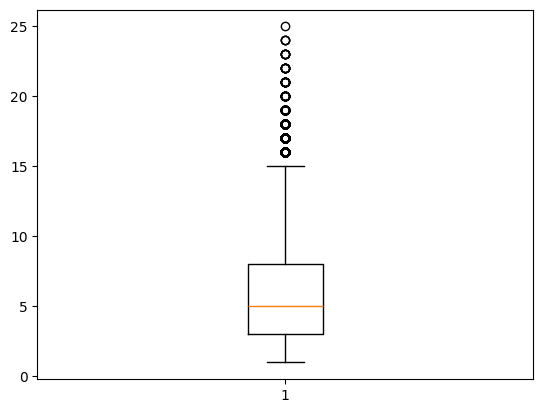

In [6]:
import matplotlib.pyplot as plt
import pickle
from collections import Counter

with open("prereqs.pickle","rb") as p:
    data,_ = pickle.load(p)

names = []
for r in data.values():
    for e in r:
        names.append(e.horse)

rc = Counter(names)
print(f"l:{len(rc.values())}")

plt.boxplot(rc.values())
plt.show()

# race results extraction
testing extracting a race ordering from the dataset.

some races don't include dollar odds?!?!?!?!?



In [ ]:
import xmlschema

xs = xmlschema.XMLSchema("./equibase/tchSchema.xsd")
d = xs.to_dict("./equibase/2023 Result Charts/wo20231202tch.xml")

r = d['RACE'][0]

for e in r['ENTRY']:
    print(f"{e['NAME']} {e['DOLLAR_ODDS']} {e['OFFICIAL_FIN']} {e['AXCISKEY']}")

# is `AXCISKEY` unique?
every entry seems to have this but idk what it actually means. would be nice to have a pk that isn't the horse's name

In [ ]:
import xmlschema
import os

xs = xmlschema.XMLSchema("./equibase/tchSchema.xsd")

result_dir = "./equibase/2023 Result Charts" 
files = os.listdir(result_dir)

key_to_name = {}
for f in files:
    try:
        d = xs.to_dict(result_dir+"/"+f)
    except xmlschema.validators.exceptions.XMLSchemaDecodeError:
        continue
    for r in d['RACE']:
        for e in r['ENTRY']:
            n = e['NAME']
            k = e['AXCISKEY']

            if k in key_to_name.keys():
                if n in key_to_name[k]:
                    # key exists and name already mapped to key
                    pass
                else:
                    key_to_name[k].append(n)
                    print(f"new name for key:{k}\n{key_to_name[k]}")
            else:
                key_to_name[k]=[n]

seems like they're adding extra info to the names of horses. I sure do love when non-computer people do stupid shit

# load test
test deserializing and generating prereqs (entry dict and dep graph) for full dataset

In [ ]:
import equibase
import rank
import networkx as nx
import matplotlib.pyplot as plt

data,G=rank.gen_prereq()

# human trials
testing against average person 

In [ ]:
import pickle
import random
import xmlschema

xs = xmlschema.XMLSchema("./equibase/tchSchema.xsd")

with open("prereqs.pickle","rb") as p:
    prereq = pickle.load(p)
    data: dict = prereq[0]

races = list(data.keys())
random.shuffle(races)
races = races[:10]

print(races)

for n,race in enumerate(races,1):
    print(f"Race {n}: {race}")
    entries = data[race]

    rname = race.split("_")
    track = rname[0].lower()
    date = rname[1].replace("-","")
    race_num = int(rname[2])
    filename = track+date+"tch.xml"

    xd = xs.to_dict(f"./equibase/2023 Result Charts/{filename}")
    key_to_name = {}
    for r in xd['RACE']:
        if r['@NUMBER'] == race_num:
            for e in r['ENTRY']:
                key_to_name[e['AXCISKEY']]=e['NAME'] 

    random.shuffle(entries)

    for e in entries:
        print(f"{key_to_name[e.horse]: <20} {e.odds: <10} {e.horse}")
    print("\n")



result of human betting

In [4]:
from betting import Win, Place, Show
from racetrack import winloss
import pickle

with open("prereqs.pickle","rb") as p:
    prereq = pickle.load(p)

races = ['CT_2023-07-29_7',
         'TUP_2023-01-28_5', 
         'SUN_2023-02-04_2', 
         'AQU_2023-02-24_1', 
         'RP_2023-04-21_8', 
         'KEE_2023-10-12_6', 
         'PRM_2023-09-09_7', 
         'RP_2023-11-29_3', 
         'TDN_2023-10-11_8', 
         'GG_2023-06-04_4'
]

bets = [
    [Win('050049050052055062060059',bet=4),Win('050049050052053059060059',bet=4),Win('050049050052060062057064',bet=3),Win('050049050052059062055061',bet=1),Win('050049050052054056060061',bet=1),Win('050049050052055062060059',bet=1),Win('050049050052053059060059',bet=1),Win('050049050051058062060058',bet=1),Win('050049050052055058056062',bet=1),Win('050049050053053055063056',bet=1),Win('050049050052060062057064',bet=1)],
    [Win('049058050052055062058057',bet=4),Win('049056050051058062062061',bet=4),Win('049056050052058053059063',bet=4),Win('049057050051053054056064',bet=3),Win('049057050052060057061061',bet=3),Win('049057050051056053063063',bet=3)],
    [Win('081052050053060053063063',bet=4),Win('081052050059058062062063',bet=4),Win('081052050060054053055056',bet=3),Win('081052050051053060058058',bet=3),Win('081052051051060055062059',bet=3),Win('081052050058055059063061',bet=3)],
    [Win('049058050051060054061064',bet=4),Win('049058050052052060055060',bet=4),Win('049058050052056057057063',bet=3),Win('049058050052054054062060',bet=10)],
    [Win('081052052054061057062058',bet=4),Win('081052052054057057054064',bet=4),Win('081052052051056053054055',bet=3),Win('081052052056056053056061',bet=3),Win('081052051060059060057059',bet=3),Win('081052053052055056061058',bet=3)],
    [Win('050049050052057056061060',bet=4),Win('049058050051058062061057',bet=3),Win('050049050051059055057056',bet=4),Win('050049050051061061054059',bet=3),Win('050049050051059055057056',bet=3),Win('049058050051058062061057',bet=3)],
    [Win('050049050052061054060061',bet=4),Win('050049050052054057060056',bet=4),Win('050049050052055053063063',bet=3),Win('050049050051052060060062',bet=3),Win('050049050052055053063063',bet=3),Win('049058050052059061063064',bet=3)],
    [Win('050050050052056058054055',bet=4),Win('050050050052056054056061',bet=4),Win('050050050052060061063055',bet=3),Win('050050050052056058054055',bet=3),Win('050050050051058055055064',bet=3),Win('050050050052060061063055',bet=3)],
    [Win('050049050052061056063057',bet=4),Win('050049050051061061063064',bet=4),Win('050049050052060057061058',bet=3),Win('050049050052061054058058',bet=3),Win('050049050052060057061058',bet=3),Win('050049050052060059055060',bet=3)],
    [Win('049056050052054062054055',bet=4),Win('049058050052058059054055',bet=4),Win('049055050052058054058058',bet=3),Win('049056050052054062054055',bet=10)]
]

wl = [[0,0],[0,0],[0,0]]

for r, b in zip(races,bets):
    for result in winloss(r,b,prereq[0]):
            if result[1] == "W":
                i1 = 0 
            elif result[1] == "P":
                i1 = 1
            elif result[1] == "S":
                i1 = 2

            if result[0]:
                i2 = 0
            else:
                i2 = 1

            wl[i1][i2] += 1

print(wl)

[[31, 171], [0, 0], [0, 0]]
